# Pokemon GAN Training Notebook

**Import libraries**

In [18]:
import pandas as pd
from torch.utils.data import DataLoader
from dataset import PokemonDataset
from GAN import WGAN
from utils import show_tensor_images
import os

**Load labels**

In [ ]:
resume_training = True
train_number = 16
gan_id = f"pokemon_train_{train_number}"

In [20]:
greyscale = False
image_dim = 64

In [21]:
dset = PokemonDataset(greyscale, n_item=None, resize=[image_dim, image_dim])
dloader = DataLoader(dset, batch_size=32, shuffle=True, num_workers=0)

In [22]:
len(dset)

419

In [23]:
next(iter(dloader))[0].shape

torch.Size([32, 3, 64, 64])

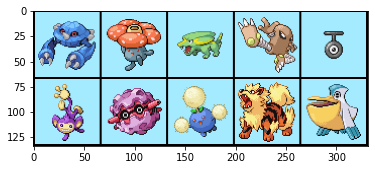

In [24]:
show_tensor_images(next(iter(dloader))[0])


**GAN Component**

In [28]:
betas = (.9, .999)
n_channel = 3
n_feature = 64
if greyscale:
    n_channel = 1
    
params = {'gen': {'n_feature': n_feature,
                  'n_channel': n_channel,
                  'lr': 5e-5,
                  'betas': betas},
          'critic': {'n_channel': n_channel,
                     'n_feature': n_feature,
                     'lr': 5e-5,
                     'betas': betas},
          'z_dim': 50,
          'gradient_penalty_factor': 4,
          'stability_noise_std': 5e-2,
          'n_conv_block': 3
         }

In [29]:
gan = WGAN(params)
if os.path.exists(f'data/models/{gan_id}.pth'):
    print(f"{gan_id} LOADED..")
    gan.load_model(f'data/models/{gan_id}.pth')

pokemon_train_10 LOADED..


In [33]:
gan.init_tensorboard(main_dir='runs', subdir=gan_id, port=8008)

In [34]:
gan.train(n_epoch=100, dataloader=dloader, n_critic_update=1, n_generator_update=1, gan_id=gan_id)

  4%|▍         | 4/100 [00:07<02:53,  1.81s/it]


KeyboardInterrupt: 

RESULT

In [31]:
import torch

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


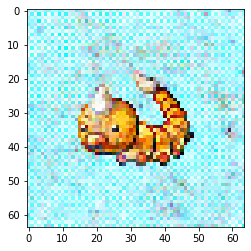

In [32]:
noise = gan.get_random_noise(1)
noise = torch.zeros_like(noise)

noise[:, [0, 1]] = -1
show_tensor_images(gan.generator(noise))

In [47]:
r = list(range(10, 30, 1)) + list(range(30, 40, 10))
v = 1 # 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


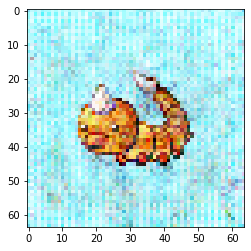

In [48]:
noise = gan.get_random_noise(1)
noise = torch.ones_like(noise)

noise[:, r] = v
show_tensor_images(gan.generator(noise))